### Parte 2: Modelagem de Machine Learning

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


#### 1. Preparação dos Dados


In [29]:
data = pd.read_csv('../data/train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
data = data.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [31]:
# Divisão em conjuntos de treino e teste antes das transformações
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Criar DataFrames separados para treino e teste para facilitar as transformações
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print("Formato dos dados de treino:", train_data.shape)
print("Formato dos dados de teste:", test_data.shape)

Formato dos dados de treino: (712, 8)
Formato dos dados de teste: (179, 8)


In [32]:
# Imputação de valores ausentes
imputer = SimpleImputer(strategy='most_frequent')
train_data['Embarked'] = imputer.fit_transform(train_data[['Embarked']]).ravel()
test_data['Embarked'] = imputer.transform(test_data[['Embarked']]).ravel()

imputer = SimpleImputer(strategy='median')
train_data['Age'] = imputer.fit_transform(train_data[['Age']]).ravel()
test_data['Age'] = imputer.transform(test_data[['Age']]).ravel()

# Criação de grupos de idade
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=[0, 12, 20, 40, 60, 80], 
                            labels=['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior'])
test_data['Age_Group'] = pd.cut(test_data['Age'], bins=[0, 12, 20, 40, 60, 80], 
                            labels=['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior'])

# One-hot encoding
columns_ohe = ['Embarked', 'Sex', 'Pclass', 'Age_Group']
train_data = pd.get_dummies(train_data, columns=columns_ohe, dtype=int)
test_data = pd.get_dummies(test_data, columns=columns_ohe, dtype=int)
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

# Feature combinada de família
train_data['SibSp_Parch'] = train_data['SibSp'] + train_data['Parch']
test_data['SibSp_Parch'] = test_data['SibSp'] + test_data['Parch']

print("\nColunas após transformações:")
print("Número de colunas:", len(train_data.columns))
print(train_data.columns.tolist())




Colunas após transformações:
Número de colunas: 19
['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_Group_Child', 'Age_Group_Teen', 'Age_Group_Adult', 'Age_Group_Middle_Aged', 'Age_Group_Senior', 'SibSp_Parch']


In [33]:
# Normalização com StandardScaler
scaler = StandardScaler()
features = ['Age', 'Fare', 'SibSp', 'Parch', 'SibSp_Parch']
train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])

# Preparação final dos conjuntos de dados
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.drop('Survived', axis=1)
y_test = test_data['Survived']

print("\nColunas finais do X_train:")
print("Número de colunas:", len(X_train.columns))
print(X_train.columns.tolist())
print("\nFormato final dos dados:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)



Colunas finais do X_train:
Número de colunas: 18
['Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_Group_Child', 'Age_Group_Teen', 'Age_Group_Adult', 'Age_Group_Middle_Aged', 'Age_Group_Senior', 'SibSp_Parch']

Formato final dos dados:
X_train: (712, 18)
X_test: (179, 18)


In [34]:
X_train.head(10)

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_Group_Child,Age_Group_Teen,Age_Group_Adult,Age_Group_Middle_Aged,Age_Group_Senior,SibSp_Parch
692,-0.081135,-0.465084,-0.466183,0.513812,0,0,1,0,1,0,0,1,0,0,1,0,0,-0.556339
481,-0.081135,-0.465084,-0.466183,-0.662563,0,0,1,0,1,0,1,0,0,0,1,0,0,-0.556339
527,-0.081135,-0.465084,-0.466183,3.955399,0,0,1,0,1,1,0,0,0,0,1,0,0,-0.556339
855,-0.887827,-0.465084,0.727782,-0.467874,0,0,1,1,0,0,0,1,0,1,0,0,0,0.073412
801,0.110934,0.478335,0.727782,-0.115977,0,0,1,1,0,0,1,0,0,0,1,0,0,0.703162
652,-0.657344,-0.465084,-0.466183,-0.486962,0,0,1,0,1,0,0,1,0,0,1,0,0,-0.556339
509,-0.273205,-0.465084,-0.466183,0.513812,0,0,1,0,1,0,0,1,0,0,1,0,0,-0.556339
557,-0.081135,-0.465084,-0.466183,4.075040,1,0,0,0,1,1,0,0,0,0,1,0,0,-0.556339
828,-0.081135,-0.465084,-0.466183,-0.501190,0,1,0,0,1,0,0,1,0,0,1,0,0,-0.556339
18,0.110934,0.478335,-0.466183,-0.287761,0,0,1,1,0,0,0,1,0,0,1,0,0,0.073412


#### 2. Seleção e Treinamento de Modelos


In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [36]:
#Testando o modelo RandomForest

rfc = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=42)

rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, n_estimators=200, random_state=42)

In [37]:
#Testando o modelo GradientBoosting

gbc = GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=200, random_state=42)

In [38]:
#Testando o modelo de SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X=X_train, y=y_train)

SVC(probability=True, random_state=42)

In [39]:
#Testando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
#Testando o modelo Logistic Regression
logreg = LogisticRegression(max_iter=200, random_state=42, penalty='l2')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

#### 3. Avaliação e Comparação



In [41]:
#Análise das métricas do modelo de RandomForest
def metrics(y_test, y_pred):    
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot()
    plt.show()

In [42]:
def analyze_model(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print("Métricas do conjunto de treino:")
    metrics(y_train, train_pred)
    print("\nMétricas do conjunto de teste:")
    metrics(y_test, test_pred)
 

Analisando o modelo: RandomForestClassifier
Métricas do conjunto de treino:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       439
           1       0.85      0.71      0.78       273

    accuracy                           0.84       712
   macro avg       0.85      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712

0.8426966292134831


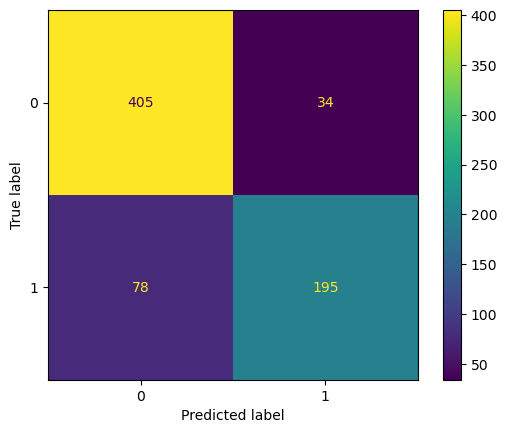


Métricas do conjunto de teste:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.65      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

0.8156424581005587


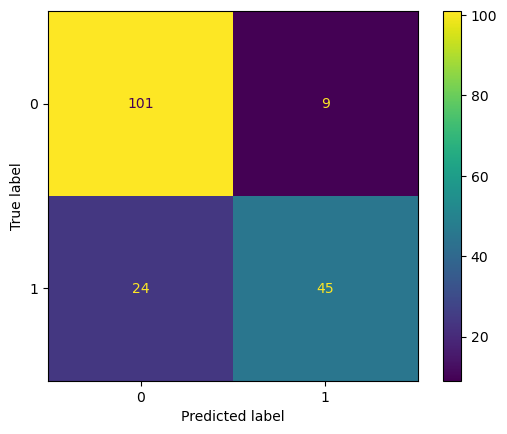


--------------------------------------------------

Analisando o modelo: GradientBoostingClassifier
Métricas do conjunto de treino:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       439
           1       0.97      0.92      0.94       273

    accuracy                           0.96       712
   macro avg       0.96      0.95      0.95       712
weighted avg       0.96      0.96      0.96       712

0.9578651685393258


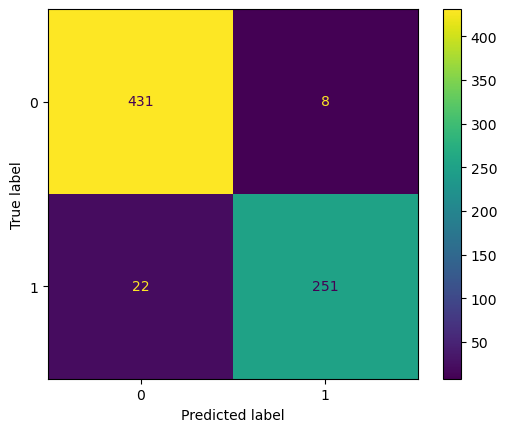


Métricas do conjunto de teste:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

0.8268156424581006


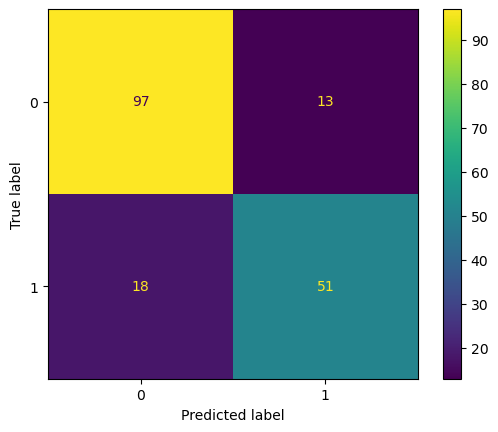


--------------------------------------------------

Analisando o modelo: SVC
Métricas do conjunto de treino:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       439
           1       0.83      0.74      0.78       273

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712

0.8398876404494382


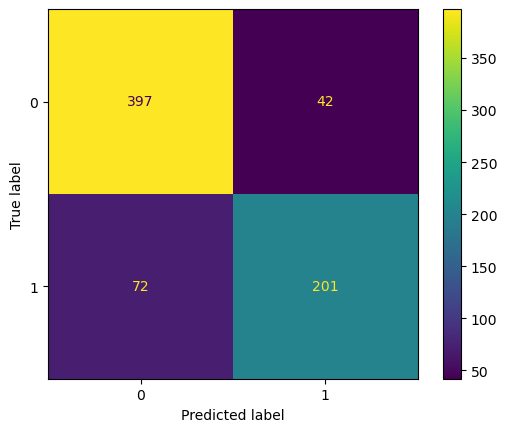


Métricas do conjunto de teste:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

0.8268156424581006


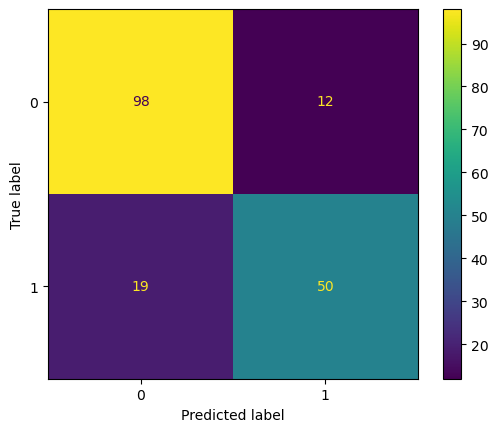


--------------------------------------------------

Analisando o modelo: KNeighborsClassifier
Métricas do conjunto de treino:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       439
           1       0.85      0.74      0.79       273

    accuracy                           0.85       712
   macro avg       0.85      0.83      0.84       712
weighted avg       0.85      0.85      0.85       712

0.8525280898876404


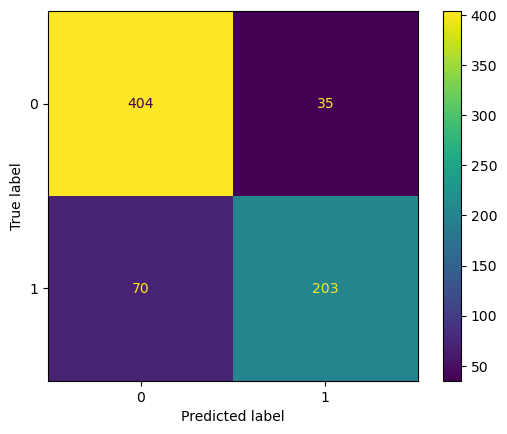


Métricas do conjunto de teste:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

0.8156424581005587


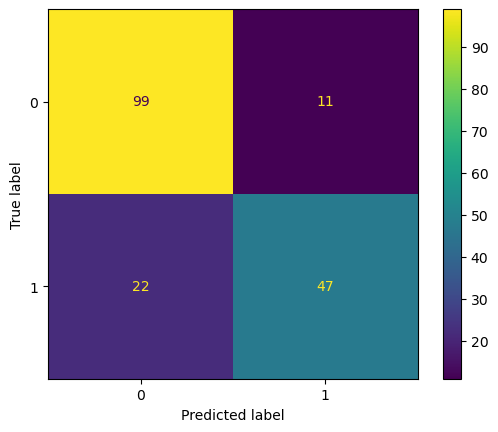


--------------------------------------------------

Analisando o modelo: LogisticRegression
Métricas do conjunto de treino:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       439
           1       0.77      0.72      0.75       273

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.80       712
weighted avg       0.81      0.81      0.81       712

0.8117977528089888


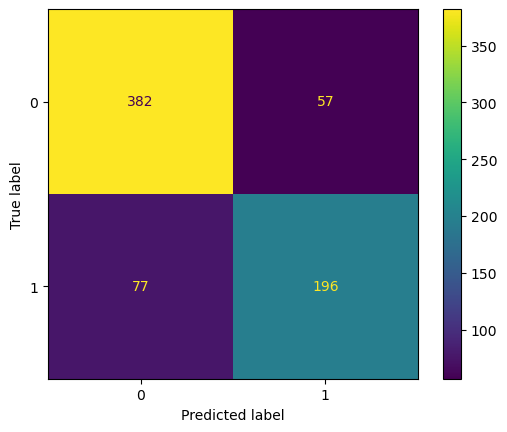


Métricas do conjunto de teste:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

0.8044692737430168


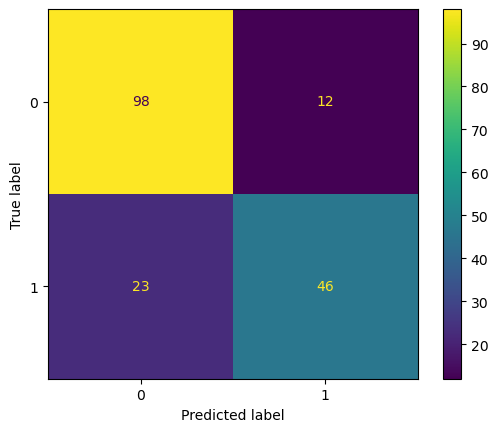


--------------------------------------------------



In [43]:
models = [rfc, gbc, svm, knn, logreg]

for model in models:
    print(f"Analisando o modelo: {model.__class__.__name__}")
    analyze_model(model, X_train, y_train, X_test, y_test)
    print("\n" + "-"*50 + "\n")

In [44]:
# Cálculo do ROC AUC
from sklearn.metrics import roc_auc_score

def compute_roc_auc(clf, X, y):
    return roc_auc_score(y, clf.predict_proba(X)[:, 1])




In [45]:
#Quadro resumo dos modelos com o cálculo de acurácia e ROC AUC no treino e teste
def results_summary(models, X_train, y_train, X_test, y_test):
    results = []
    if models.__class__ == dict:
        models = models.values()
    
    for model in models:
        model_name = model.__class__.__name__
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        accuracy_train = accuracy_score(y_train, train_pred)
        accuracy_test = accuracy_score(y_test, test_pred)
        roc_auc_train = compute_roc_auc(model, X_train, y_train)
        roc_auc_test = compute_roc_auc(model, X_test, y_test)
        results.append({
            'Model': model_name,
            'Accuracy Train': accuracy_train,
            'Accuracy Test': accuracy_test,
            'ROC AUC Train': roc_auc_train,
            'ROC AUC Test': roc_auc_test
        })
    results_df = pd.DataFrame(results).set_index('Model')
    plt.figure(figsize=(10, 6))
    results_df[['Accuracy Train', 'Accuracy Test', 'ROC AUC Train', 'ROC AUC Test']].plot(kind='bar')
    plt.title('Desempenho dos Modelos')
    plt.legend(bbox_to_anchor=(1.50, 1))
    plt.ylabel('Score')
    plt.show()
    return results_df

                              

<Figure size 1000x600 with 0 Axes>

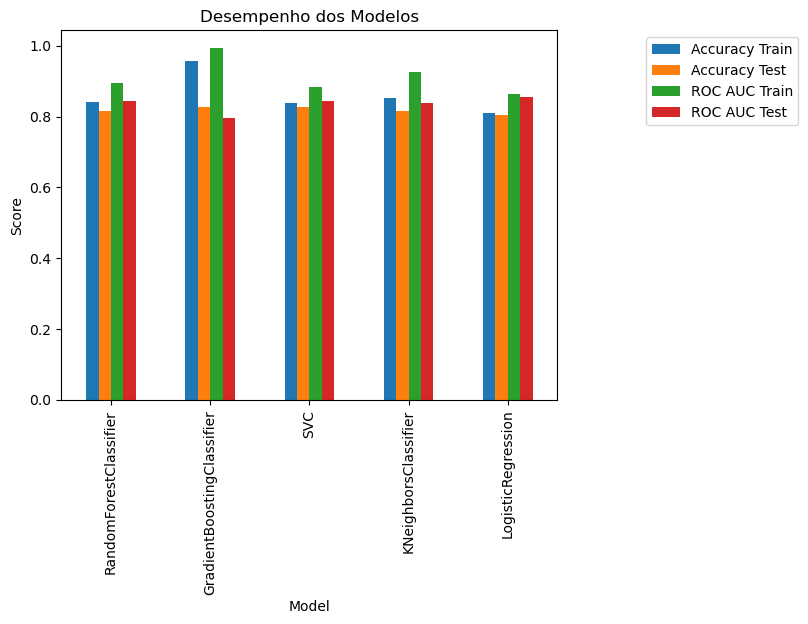

,Accuracy Train,Accuracy Test,ROC AUC Train,ROC AUC Test
Model,,,,
RandomForestClassifier,0.842697,0.815642,0.896443,0.844730
GradientBoostingClassifier,0.957865,0.826816,0.994464,0.796245
SVC,0.839888,0.826816,0.883084,0.844664
KNeighborsClassifier,0.852528,0.815642,0.926039,0.837286
LogisticRegression,0.811798,0.804469,0.862692,0.855995


In [46]:
results_summary(models, X_train, y_train, X_test, y_test)

#### 4. Otimização de Hiperparâmetros


In [47]:
#Otimização dos hiperparâmetros pode ser feita usando RandomizedSearchCV do sklearn.model_selection.
from sklearn.model_selection import RandomizedSearchCV


In [48]:
param_distributions = {
    "RandomForestClassifier": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    "GradientBoostingClassifier": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.05, 0.1],
    },
    "LogisticRegression": [
        {'solver': ['lbfgs'], 'penalty': ['l2', None], 'C': [0.01, 0.1, 1, 10], 'max_iter': [300, 500, 1000]},
        {'solver': ['saga'], 'penalty': ['l1', 'l2', None], 'C': [0.01, 0.1, 1, 10], 'max_iter': [300, 500, 1000]}
    ],
    "SVC": {
        'C': [0.01, 0.1, 1],
        'kernel': ['rbf', 'sigmoid'],
        'gamma': ['scale'],
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 9],
        'metric': ['euclidean', 'minkowski', 'manhattan'],
    }
}

        

In [49]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
for model in models:
    model_name = model.__class__.__name__
    params = param_distributions.get(model_name)
    if params:
        try:
            model_random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=30, cv=cv, scoring='accuracy', n_jobs=-1)
            model_random.fit(X_train, y_train)
            best_models[model_name] = model_random.best_estimator_
            print(f"{model_name} - Best Params: {model_random.best_params_}")            
        except Exception as e:
            print(f"Erro ao ajustar {model_name}: {e}")
    else:
        print(f"{model_name} não possui parâmetros definidos para busca.")


RandomForestClassifier - Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3}


c:\Users\Glauc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 27 is smaller than n_iter=30. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GradientBoostingClassifier - Best Params: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01}


c:\Users\Glauc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=30. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVC - Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
KNeighborsClassifier - Best Params: {'n_neighbors': 9, 'metric': 'manhattan'}


c:\Users\Glauc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=30. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LogisticRegression - Best Params: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 300, 'C': 1}


<Figure size 1000x600 with 0 Axes>

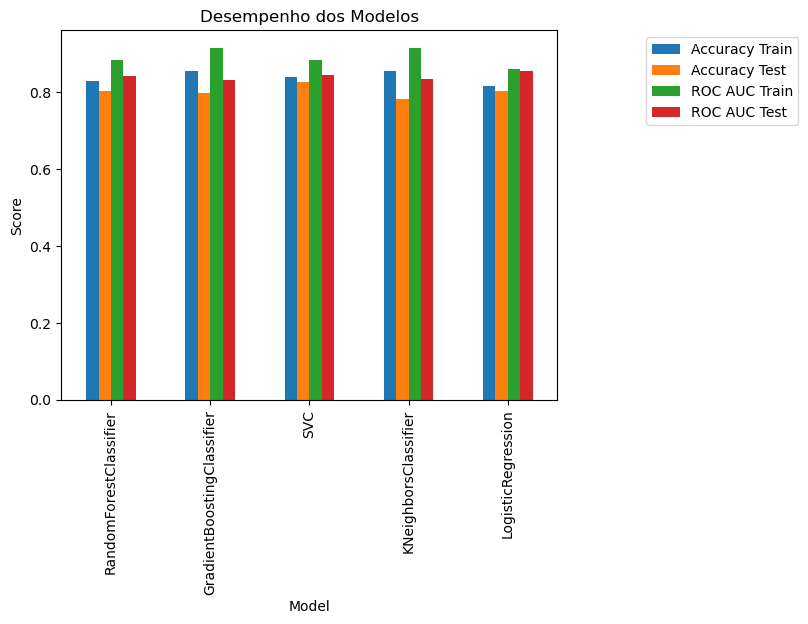

,Accuracy Train,Accuracy Test,ROC AUC Train,ROC AUC Test
Model,,,,
RandomForestClassifier,0.828652,0.804469,0.883589,0.842029
GradientBoostingClassifier,0.855337,0.798883,0.914821,0.832543
SVC,0.839888,0.826816,0.883084,0.844664
KNeighborsClassifier,0.856742,0.782123,0.915947,0.835837
LogisticRegression,0.816011,0.804469,0.862174,0.856785


In [50]:
results_summary(best_models, X_train, y_train, X_test, y_test)

### Análise de Overfitting

O modelo Gradient Boosting inicial apresentou overfitting severo:
- Diferença de 13.1% em accuracy entre treino e teste
- Diferença de 19.8% em ROC AUC

Após otimização de hiperparâmetros (redução de max_depth e n_estimators), 
o overfitting foi reduzido para:
- Diferença de 5.6% em accuracy
- Diferença de 8.2% em ROC AUC

Isso demonstra a importância da validação cruzada e ajuste de hiperparâmetros.



c:\Users\Glauc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVC - Best Params: {'gamma': 'auto', 'C': 1.5}
LogisticRegression - Best Params: {'penalty': 'l1', 'C': 1}


c:\Users\Glauc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

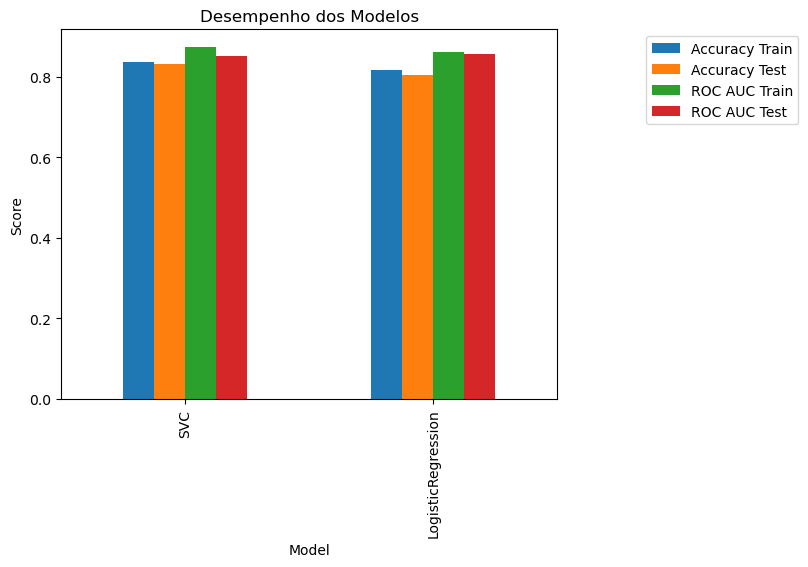

,Accuracy Train,Accuracy Test,ROC AUC Train,ROC AUC Test
Model,,,,
SVC,0.835674,0.832402,0.873631,0.850198
LogisticRegression,0.816011,0.804469,0.862174,0.856785


In [53]:
#Realizar ajuste fine nos modelos SVC e LOgisticRegression
best_models_fine = {}
for model_name in ['SVC', 'LogisticRegression']:
    model = best_models[model_name]
    if model_name == 'SVC':
        fine_params = {
            'C': [model.C * 0.5, model.C, model.C * 1.5],
            'gamma': ['scale', 'auto']
        }
    elif model_name == 'LogisticRegression':
        fine_params = {
            'C': [model.C * 0.5, model.C, model.C * 1.5],
            'penalty': [model.penalty]
        }
    try:
        model_random = RandomizedSearchCV(estimator=model, param_distributions=fine_params, n_iter=10, cv=cv, scoring='accuracy', n_jobs=-1)
        model_random.fit(X_train, y_train)
        best_models_fine[model_name] = model_random.best_estimator_
        print(f"{model_name} - Best Params: {model_random.best_params_}")
    except Exception as e:
        print(f"Erro ao ajustar {model_name}: {e}") 
results_summary(best_models_fine, X_train, y_train, X_test, y_test)                

## Conclusão

Após otimização de hiperparâmetros, o **SVC** emergiu como o modelo de melhor 
desempenho para este problema:

- **Accuracy no teste**: 83.24%
- **ROC AUC no teste**: 0.8502
- **Generalização**: Excelente (gap treino-teste de apenas 0.33%)

A **Logistic Regression** também se destacou pelo maior AUC (0.8568) e 
excelente capacidade de generalização, sendo uma alternativa mais interpretável.

O **Random Forest otimizado** apresentou o melhor equilíbrio entre simplicidade 
e performance, sendo recomendado para produção pela sua robustez.
"""


#### 5. Previsões e Submissão


In [57]:
print("="*70)
print("PREPARAÇÃO PARA SUBMISSÃO KAGGLE - TITANIC")
print("="*70)

# 1. CARREGAR DADOS ORIGINAIS
train_original = pd.read_csv('../data/train.csv')
test_kaggle = pd.read_csv('../data/test.csv')
passenger_ids = test_kaggle['PassengerId']

print(f"\n1. Dataset de treino: {train_original.shape}")
print(f"   Dataset de teste:  {test_kaggle.shape}")

# 2. PREPROCESSING (função reutilizada - substitua pela sua)
def preprocess_titanic(train_df, test_df):
    train = train_df.copy()
    test = test_df.copy()

    columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    train = train.drop(columns_to_drop, axis=1)
    test = test.drop(columns_to_drop, axis=1)
    
    # Imputação
    imputer_age = SimpleImputer(strategy='median')
    train['Age'] = imputer_age.fit_transform(train[['Age']]).ravel()
    test['Age'] = imputer_age.transform(test[['Age']]).ravel()
    
    imputer_embarked = SimpleImputer(strategy='most_frequent')
    train['Embarked'] = imputer_embarked.fit_transform(train[['Embarked']]).ravel()
    test['Embarked'] = imputer_embarked.transform(test[['Embarked']]).ravel()
    
    if test['Fare'].isnull().sum() > 0:
        imputer_fare = SimpleImputer(strategy='median')
        test['Fare'] = imputer_fare.fit_transform(test[['Fare']]).ravel()
    
    # Feature Engineering
    train['Age_Group'] = pd.cut(train['Age'], bins=[0, 12, 20, 40, 60, 80], 
                                labels=['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior'])
    test['Age_Group'] = pd.cut(test['Age'], bins=[0, 12, 20, 40, 60, 80], 
                               labels=['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior'])
    
    train['SibSp_Parch'] = train['SibSp'] + train['Parch']
    test['SibSp_Parch'] = test['SibSp'] + test['Parch']
    
    # One-Hot Encoding
    columns_ohe = ['Embarked', 'Sex', 'Pclass', 'Age_Group']
    train = pd.get_dummies(train, columns=columns_ohe, dtype=int)
    test = pd.get_dummies(test, columns=columns_ohe, dtype=int)
    test = test.reindex(columns=train.columns, fill_value=0)
    
    # Normalização
    features_to_scale = ['Age', 'Fare', 'SibSp', 'Parch', 'SibSp_Parch']
    scaler = StandardScaler()
    train[features_to_scale] = scaler.fit_transform(train[features_to_scale])
    test[features_to_scale] = scaler.transform(test[features_to_scale])
    
    X_train = train.drop('Survived', axis=1)
    y_train = train['Survived']
    X_test = test.drop('Survived', axis=1, errors='ignore')
    
    return X_train, y_train, X_test

X_train_full, y_train_full, X_test_kaggle = preprocess_titanic(train_original, test_kaggle)

print(f"\n2. Preprocessing concluído:")
print(f"   X_train: {X_train_full.shape}")
print(f"   X_test:  {X_test_kaggle.shape}")

# 3. RETREINAR MODELO FINAL
print(f"\n3. Retreinando modelo SVC com hiperparâmetros otimizados...")
final_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
final_model.fit(X_train_full, y_train_full)
print("   ✓ Treinamento concluído!")

# 4. FAZER PREDIÇÕES
print(f"\n4. Fazendo predições no teste do Kaggle...")
predictions = final_model.predict(X_test_kaggle)
survived_count = (predictions == 1).sum()
died_count = (predictions == 0).sum()
print(f"   Sobreviveram: {survived_count} ({survived_count/len(predictions)*100:.1f}%)")
print(f"   Morreram:     {died_count} ({died_count/len(predictions)*100:.1f}%)")

# 5. CRIAR ARQUIVO DE SUBMISSÃO
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

print(f"\n5. Criando arquivo de submissão...")
print(f"   Shape: {submission.shape} (deve ser 418 x 2)")
print(f"   Colunas: {submission.columns.tolist()}")
print(f"\n   Preview:")
print(submission.head())

# Salvar
submission.to_csv('titanic_submission_svc.csv', index=False)

print("\n" + "="*70)
print("✓ ARQUIVO 'titanic_submission_svc.csv' CRIADO COM SUCESSO!")
print("✓ PRONTO PARA SUBMISSÃO NO KAGGLE!")
print("="*70)


PREPARAÇÃO PARA SUBMISSÃO KAGGLE - TITANIC

1. Dataset de treino: (891, 12)
   Dataset de teste:  (418, 11)

2. Preprocessing concluído:
   X_train: (891, 18)
   X_test:  (418, 18)

3. Retreinando modelo SVC com hiperparâmetros otimizados...
   ✓ Treinamento concluído!

4. Fazendo predições no teste do Kaggle...
   Sobreviveram: 139 (33.3%)
   Morreram:     279 (66.7%)

5. Criando arquivo de submissão...
   Shape: (418, 2) (deve ser 418 x 2)
   Colunas: ['PassengerId', 'Survived']

   Preview:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

✓ ARQUIVO 'titanic_submission_svc.csv' CRIADO COM SUCESSO!
✓ PRONTO PARA SUBMISSÃO NO KAGGLE!
